In [29]:
import rioxarray as riox
import xarray as xr
import os
import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.animation as animation

In [33]:
inDIR = '/90daydata/cper_neon_aop/hls_nrt/gcloud/'
inSHP = '../../data/ground/boundaries/cper_pastures_2017_dissolved.shp'
outDIR = './cper_anims'
fLIST = glob.glob(inDIR + '*.nc')

In [34]:
ds = riox.open_rasterio(fLIST[0], masked=True)
cper = gpd.read_file(inSHP)

In [36]:
ds

<xarray.Dataset>
Dimensions:      (y: 325, x: 323, date: 365)
Coordinates:
  * y            (y) float64 4.993e+06 4.993e+06 4.993e+06 ... 4.98e+06 4.98e+06
  * x            (x) float64 -1.167e+07 -1.167e+07 ... -1.165e+07 -1.165e+07
  * date         (date) object 2023-01-01 00:00:00 ... 2023-12-31 00:00:00
    spatial_ref  int64 0
Data variables:
    BARE         (date, y, x) float32 ...
    GREEN        (date, y, x) float32 ...
    SD           (date, y, x) float32 ...
    LITT         (date, y, x) float32 ...
    Biomass      (date, y, x) float32 ...
    Biomass_SE   (date, y, x) float32 ...
    NDVI         (date, y, x) float32 ...
    DRYVEG       (date, y, x) float32 ...
    NONVEG       (date, y, x) float32 ...
Attributes:
    _FillValue:  3.402823466385289e+38

In [37]:
yr=2023

In [38]:
dates = [x for x in ds.date]# if x >= datetime.datetime(yr, 5, 1) and x <= datetime.datetime(yr, 10, 15)]

In [39]:
duration_secs = 20
pixpi_out = 50
dpi_out = 100
print('width: ', str(len(ds.x)/pixpi_out),
      'height: ', str(len(ds.y)/pixpi_out))

width:  6.46 height:  6.5


In [45]:
cper = cper.to_crs(ds.rio.crs.to_epsg())

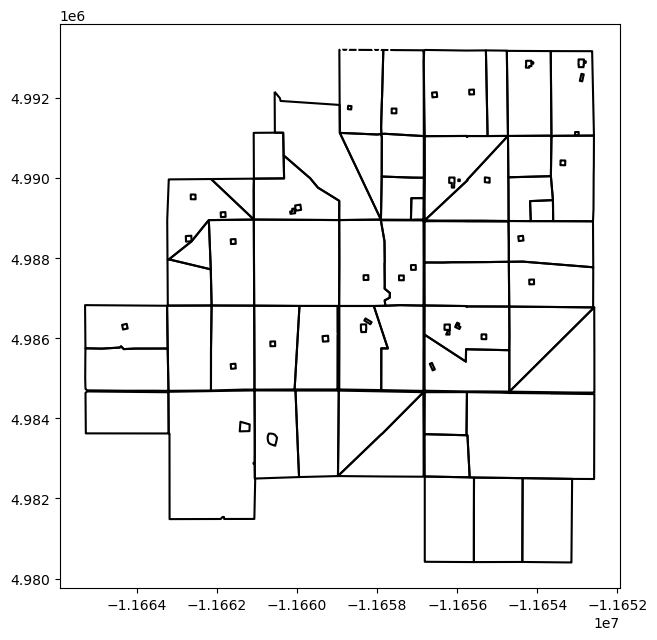

In [60]:
fig, ax = plt.subplots(figsize=(len(ds.x)/pixpi_out, len(ds.y)/pixpi_out), layout='constrained')
cper.boundary.plot(ax=ax, edgecolor='black')
date_text = ax.text(0.5, 0.95, 
                    dates[0].dt.floor('D').dt.strftime("%Y-%m-%d").values,
                    c='white', size=14, horizontalalignment='center', fontweight=500,
                    #backgroundcolor='grey', backgroundalpha=0.5,
                    transform=ax.transAxes, animated=True)

In [61]:
from rasterio.plot import show

<Figure size 640x480 with 0 Axes>

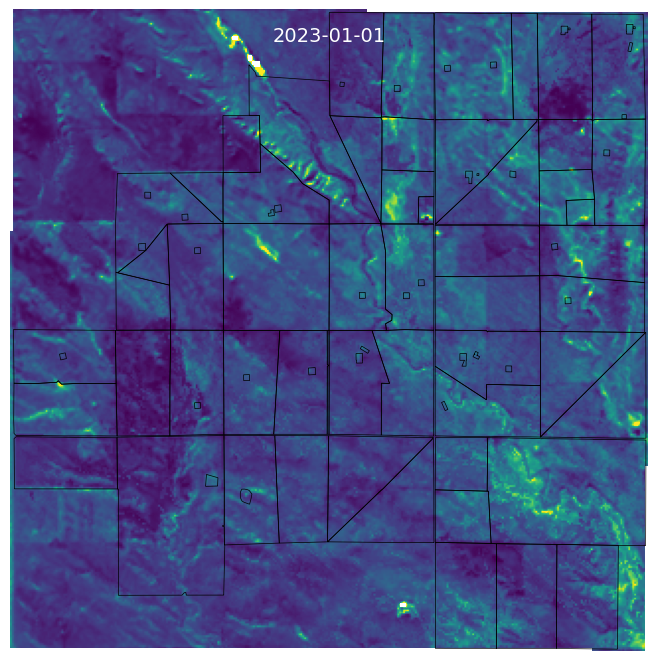

In [69]:
fig = plt.figure()

fig, ax = plt.subplots(figsize=(len(ds.x)/pixpi_out, len(ds.y)/pixpi_out), layout='constrained')
ax.axis('off')
im = show(ds.sel(date=dates[0])['Biomass'].data, vmin=100, vmax=2750, ax=ax, 
          transform=ds.rio.transform(), animated=True)
cper.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
date_text = ax.text(0.5, 0.95, 
                    dates[0].dt.floor('D').dt.strftime("%Y-%m-%d").values,
                    c='white', size=14, horizontalalignment='center', fontweight=500,
                    #backgroundcolor='grey', backgroundalpha=0.5,
                    transform=ax.transAxes, animated=True)

In [76]:
def animate_xr_ts(frame):
    #ax.imshow(xr_all.sel(date=dates[frame])['biomass_lb_ac'].data, vmin=100, vmax=2750, animated=True)
    #ax.axis("off")
    #ax.set_title(dates[frame].dt.floor('D').dt.strftime("%Y-%m-%d").values)
    im.images[0].set_data(ds.sel(date=dates[frame])['Biomass'].data)
    date_text.set_text(dates[frame].dt.floor('D').dt.strftime("%Y-%m-%d").values)
    return (im, date_text)

ani = animation.FuncAnimation(fig, animate_xr_ts, interval=200,
                              frames=len(dates), repeat=True, repeat_delay=1000)

writer = animation.PillowWriter(fps=len(dates)//duration_secs)
ani.save(os.path.join(outDIR, 'cper_biomass_anim_' + str(yr) + '.gif'), 
         dpi=dpi_out,
         writer=writer,
         savefig_kwargs={'transparent': True, 'pad_inches': 0},
         progress_callback=lambda i, n: print(f'Saving frame {i+1} of {n}', end='\r'))

In [78]:
ds.sel(date=dates[0])[['SD', 'GREEN', 'BARE']].to_array().values.transpose(1, 2, 0).shape

(325, 323, 3)

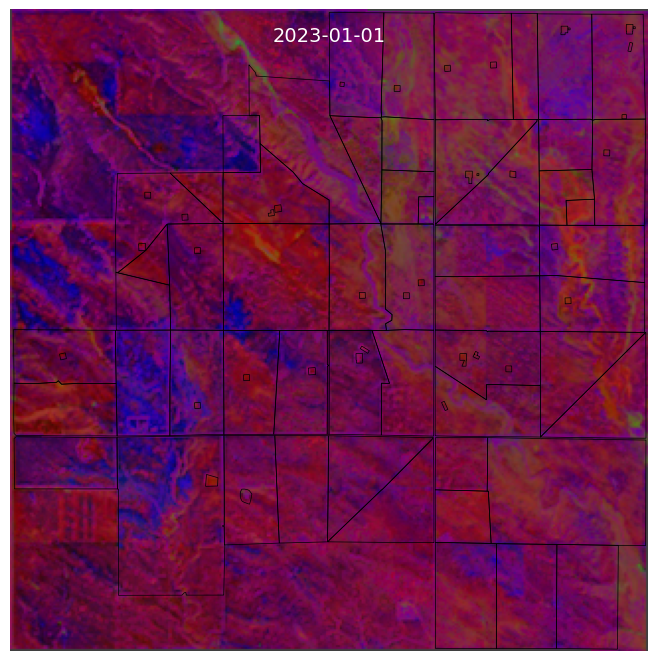

In [80]:
fig, ax = plt.subplots(figsize=(len(ds.x)/pixpi_out, len(ds.y)/pixpi_out), layout='constrained')
ax.axis('off')
#im = ax.imshow(ds.sel(date=dates[0])[['SD', 'GREEN', 'BARE']].to_array().values.transpose(1, 2, 0), vmin=0, vmax=1.0, animated=True)
im = show(ds.sel(date=dates[0])[['SD', 'GREEN', 'BARE']].to_array().values, vmin=0, vmax=1.0, ax=ax, 
          transform=ds.rio.transform(), animated=True)
cper.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)
date_text = ax.text(0.5, 0.95, 
                    dates[0].dt.floor('D').dt.strftime("%Y-%m-%d").values,
                    c='white', size=14, horizontalalignment='center', fontweight=500,
                    #backgroundcolor='grey', backgroundalpha=0.5,
                    transform=ax.transAxes, animated=True)

In [81]:
def animate_xr_ts(frame):
    #ax.imshow(xr_all.sel(date=dates[frame])['biomass_lb_ac'].data, vmin=100, vmax=2750, animated=True)
    #ax.axis("off")
    #ax.set_title(dates[frame].dt.floor('D').dt.strftime("%Y-%m-%d").values)
    im.images[0].set_data(ds.sel(date=dates[frame])[['SD', 'GREEN', 'BARE']].to_array().values.transpose(1, 2, 0))
    date_text.set_text(dates[frame].dt.floor('D').dt.strftime("%Y-%m-%d").values)
    return (im, date_text)

ani = animation.FuncAnimation(fig, animate_xr_ts, interval=200,
                              frames=len(dates), repeat=True, repeat_delay=1000)

writer = animation.PillowWriter(fps=len(dates)//duration_secs)
ani.save(os.path.join(outDIR, 'cper_cover_anim_' + str(yr) + '.gif'),
         dpi=dpi_out,
         writer=writer,
         savefig_kwargs={'transparent': True, 'pad_inches': 0},
         progress_callback=lambda i, n: print(f'Saving frame {i+1} of {n}', end='\r'))